# About Dataset

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

# Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Reading Data

In [2]:
import pandas as pd 
import numpy as np 
import os 
data = pd.read_csv("C:/Users/MSI/Downloads/Iris/Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Exploring Data

In [4]:
data.shape

(150, 6)

In [5]:
data.ndim

2

In [6]:
species_counts = data['Species'].value_counts().rename('count')
species_percentages = data['Species'].value_counts(normalize=True).rename('%').mul(100)

In [7]:
data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Samples by Iris Species')

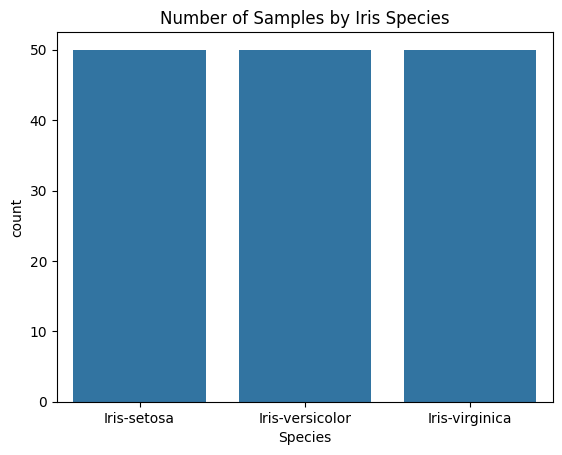

In [8]:
sns.countplot(data=data , x='Species')
plt.title('Number of Samples by Iris Species')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
data.sample(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
60,61,5.0,2.0,3.5,1.0,Iris-versicolor
47,48,4.6,3.2,1.4,0.2,Iris-setosa
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
109,110,7.2,3.6,6.1,2.5,Iris-virginica
20,21,5.4,3.4,1.7,0.2,Iris-setosa
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
124,125,6.7,3.3,5.7,2.1,Iris-virginica
110,111,6.5,3.2,5.1,2.0,Iris-virginica
69,70,5.6,2.5,3.9,1.1,Iris-versicolor
71,72,6.1,2.8,4.0,1.3,Iris-versicolor


In [11]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# features name

In [12]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [13]:
data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Missing Values

In [14]:
print('Missing data sum :')
print(data.isnull().sum())
print('\nMissing data percentage (%):')
print(data.isnull().sum()/data.count()*100)

Missing data sum :
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Missing data percentage (%):
Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64


# Correlation Matrix

Text(0.5, 1.0, 'Iris Feature Correlations')

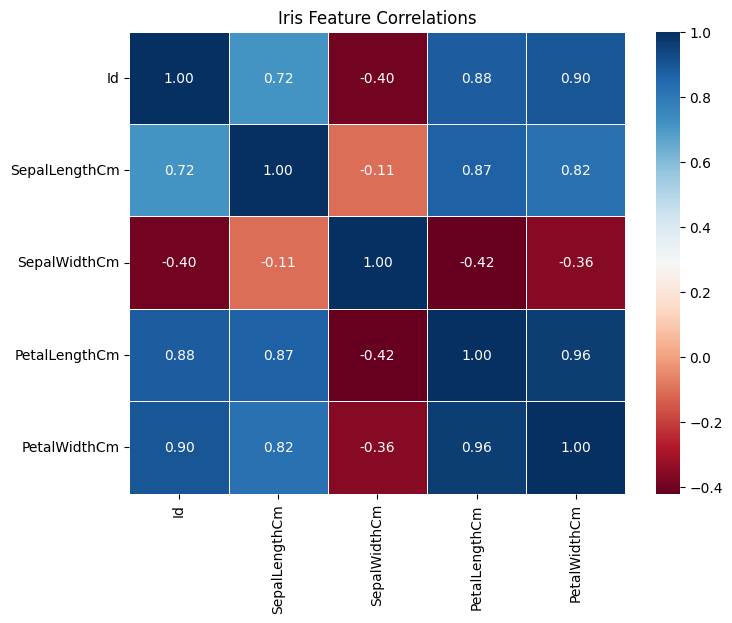

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="RdBu", linewidths=.5, fmt=".2f")
plt.title('Iris Feature Correlations')

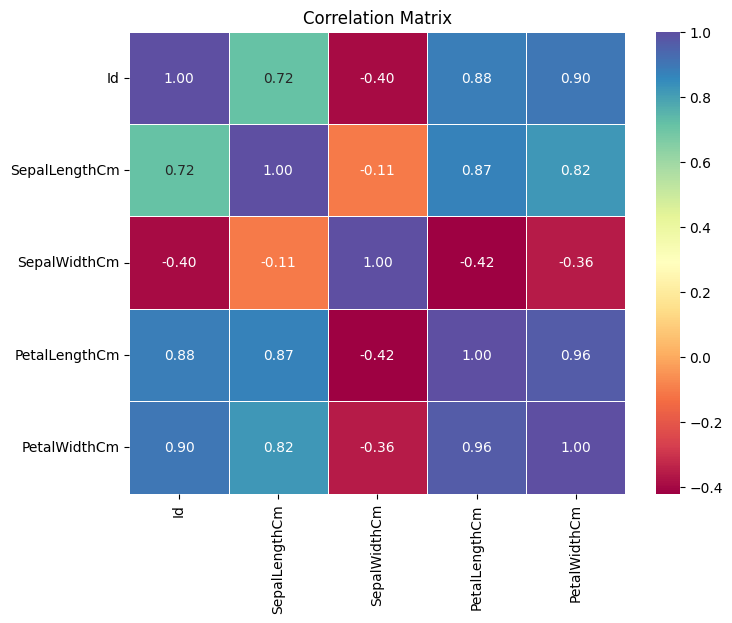

In [16]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(data=corr, annot=True, cmap='Spectral', linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Seperate Categorical and Numerical Features

In [17]:
cat_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  1
********************************************************************************
Categorical variables column name: ['Species']


In [18]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  5
********************************************************************************
Numerical Variables Column:  ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


# Checking Duplicating Values

In [19]:
data.duplicated().sum()

np.int64(0)

In [20]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [21]:
data['SepalLengthCm'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [22]:
data['SepalWidthCm'].nunique()

23

In [23]:
data['SepalWidthCm'].sample(10)

129    3.0
34     3.1
25     3.0
94     2.7
55     2.8
73     2.8
95     3.0
6      3.4
51     3.2
42     3.2
Name: SepalWidthCm, dtype: float64

In [24]:
data['PetalLengthCm'].unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [25]:
data['PetalWidthCm'].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [26]:
data['Species'].nunique()

3

In [27]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [28]:
corr_matrix = data.select_dtypes(include='number').corr().round(2)
corr_matrix              

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.00,0.72,-0.40,0.88,0.90
SepalLengthCm,0.72,1.00,-0.11,0.87,0.82
SepalWidthCm,-0.40,-0.11,1.00,-0.42,-0.36
PetalLengthCm,0.88,0.87,-0.42,1.00,0.96
PetalWidthCm,0.90,0.82,-0.36,0.96,1.00


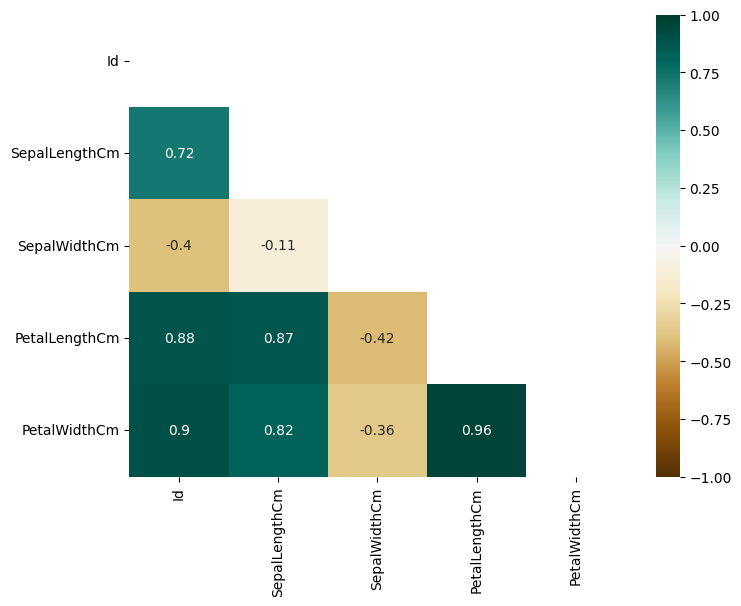

In [29]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, mask=mask, annot=True, cmap='BrBG')
plt.show()

Visualizing Categorical Features
-

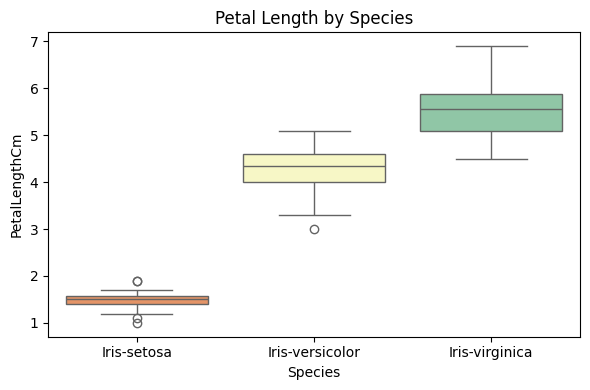

In [30]:
plt.figure(figsize=(6, 4))
ax = sns.boxplot(data=data, x='Species', y='PetalLengthCm', hue='Species', palette='Spectral')
plt.title('Petal Length by Species')
plt.tight_layout()
plt.show()

# Barplot of numerical features:


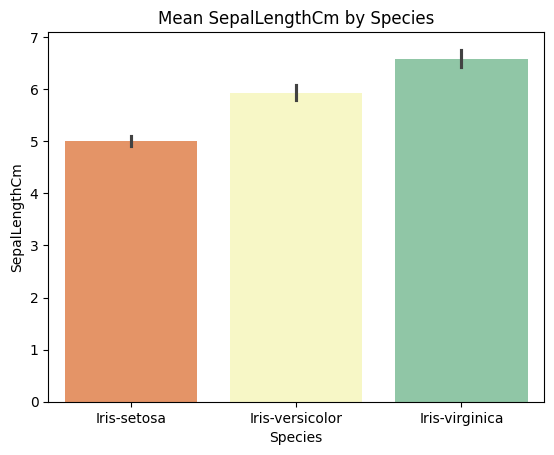

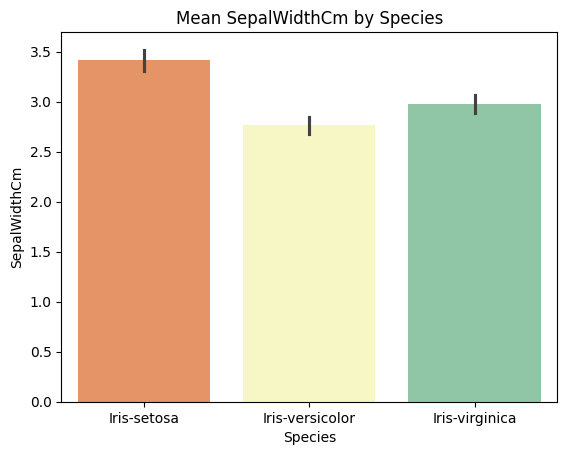

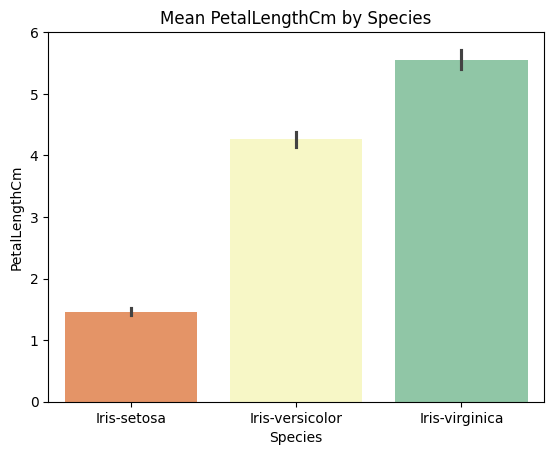

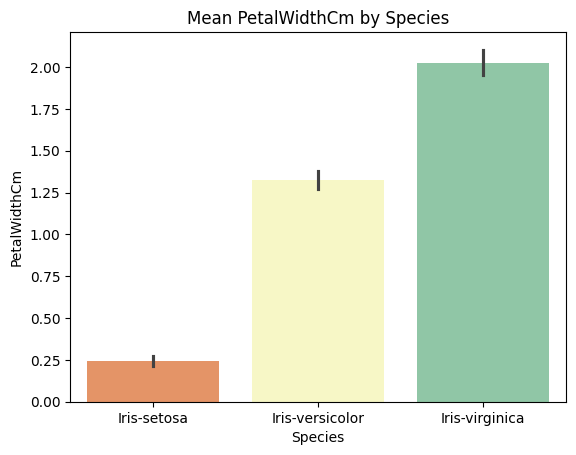

In [31]:
for col in ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']:
    sns.barplot(data=data, x='Species', y=col, hue='Species', palette='Spectral', legend=False)
    plt.title(f'Mean {col} by Species')
    plt.show()

# Handling Missing Values

In [32]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [34]:
data['SepalLengthCm'] = data['SepalLengthCm'].fillna(data['SepalLengthCm'].mean())
data['SepalWidthCm'] = data['SepalWidthCm'].fillna(data['SepalWidthCm'].mean())
data['PetalLengthCm'] = data['PetalLengthCm'].fillna(data['PetalLengthCm'].mean())
data['PetalWidthCm'] = data['PetalWidthCm'].fillna(data['PetalWidthCm'].mean())

In [35]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# dropping irrelevant feature "id"

In [36]:
train = data.drop(['Id'], axis=1)
train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [37]:
train.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [38]:
train.shape

(150, 5)

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [40]:
train_data_cat = train.select_dtypes("object")
train_data_num = train.select_dtypes("number")

In [41]:
train_data_cat.head(3)

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa


In [42]:
train_data_num.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


Converting categorical features into numerical
-

In [43]:
train_data_cata_encoded=pd.get_dummies(train_data_cat, columns=train_data_cat.columns.to_list())
train_data_cata_encoded.head()

,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


In [44]:
data=pd.concat([train_data_cata_encoded,train_data_num],axis=1,join="outer")
data.head()

,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,True,False,False,5.1,3.5,1.4,0.2
1,True,False,False,4.9,3.0,1.4,0.2
2,True,False,False,4.7,3.2,1.3,0.2
3,True,False,False,4.6,3.1,1.5,0.2
4,True,False,False,5.0,3.6,1.4,0.2


# seperate dependant and independant feature

In [45]:
data.columns = data.columns.str.strip()
print(data.columns.tolist())

['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [46]:
data['Species'] = data[['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica']].idxmax(axis=1)
data['Species'] = data['Species'].str.replace('Species_', '')
y = data['Species']
x = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [47]:
print(x.shape)
print(y.shape)

(150, 4)
(150,)


# scaling the data

In [48]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [49]:
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

# Splitting data into Training and Testing

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import SVC
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

# Splitting the dataset

- training data 70%
- testing data 30%

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)
X_train.shape, X_test.shape

((105, 4), (45, 4))

# Building Classifiers

In [52]:
accuracy = {}

# Logistic Regression

In [53]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
print(accuracy_score(y_test, y_pred1))
accuracy[str(lr)] = accuracy_score(y_test, y_pred1)*100

0.9111111111111111


# Confusion Matrix 

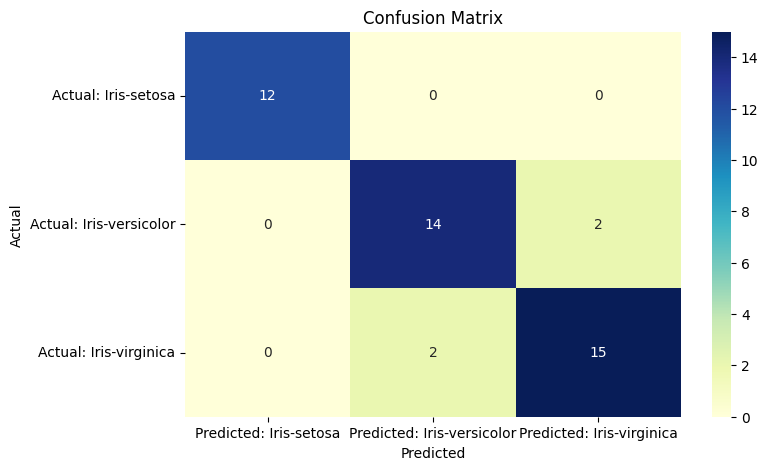

In [54]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred1)
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
conf_matrix = pd.DataFrame(data=cm, columns=[f'Predicted: {label}' for label in class_names],
index=[f'Actual: {label}' for label in class_names])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report

In [55]:
print(classification_report(y_test,y_pred1))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      0.88      0.88        16
 Iris-virginica       0.88      0.88      0.88        17

       accuracy                           0.91        45
      macro avg       0.92      0.92      0.92        45
   weighted avg       0.91      0.91      0.91        45



# Predicting

In [56]:
y_pred_test = lr.predict(X_test)
test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

In [57]:
test.sample(10)

,Actual,Y test predicted
149,Iris-virginica,Iris-virginica
5,Iris-setosa,Iris-setosa
95,Iris-versicolor,Iris-versicolor
84,Iris-versicolor,Iris-versicolor
116,Iris-virginica,Iris-virginica
94,Iris-versicolor,Iris-versicolor
45,Iris-setosa,Iris-setosa
22,Iris-setosa,Iris-setosa
76,Iris-versicolor,Iris-versicolor
97,Iris-versicolor,Iris-versicolor


# DecisionTreeClassifier

In [58]:
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)
y_pred2 = dtc.predict(X_test)
print(accuracy_score(y_test, y_pred2))
accuracy[str(dtc)] = accuracy_score(y_test, y_pred2)*100

0.8888888888888888


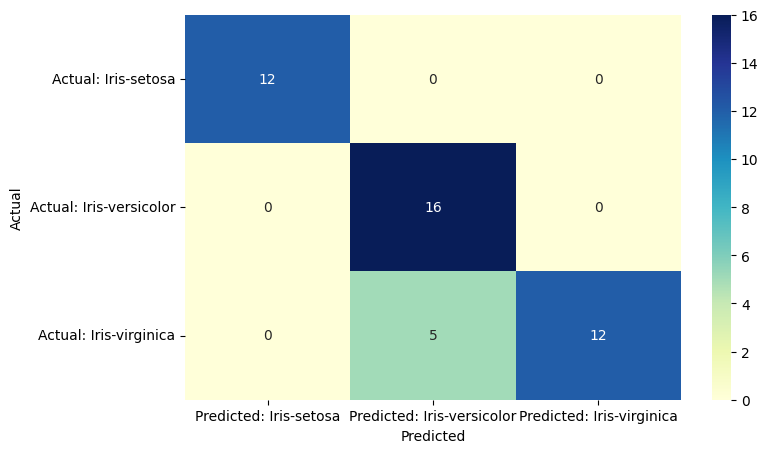

In [59]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred2)
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
conf_matrix = pd.DataFrame(data=cm, columns=[f'Predicted: {label}' for label in class_names],index=[f'Actual: {label}' for label in class_names])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [60]:
print(classification_report(y_test,y_pred2))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.76      1.00      0.86        16
 Iris-virginica       1.00      0.71      0.83        17

       accuracy                           0.89        45
      macro avg       0.92      0.90      0.90        45
   weighted avg       0.92      0.89      0.89        45



In [61]:
y_pred_test = dtc.predict(X_test)
test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

In [62]:
test.head(5)

,Actual,Y test predicted
149,Iris-virginica,Iris-virginica
84,Iris-versicolor,Iris-versicolor
40,Iris-setosa,Iris-setosa
66,Iris-versicolor,Iris-versicolor
106,Iris-virginica,Iris-versicolor


In [63]:
rfc = RandomForestClassifier(max_depth=5)
rfc.fit(X_train, y_train)
y_pred3 = rfc.predict(X_test)
print(accuracy_score(y_test, y_pred3))
accuracy[str(rfc)] = accuracy_score(y_test, y_pred3)*100

0.9111111111111111


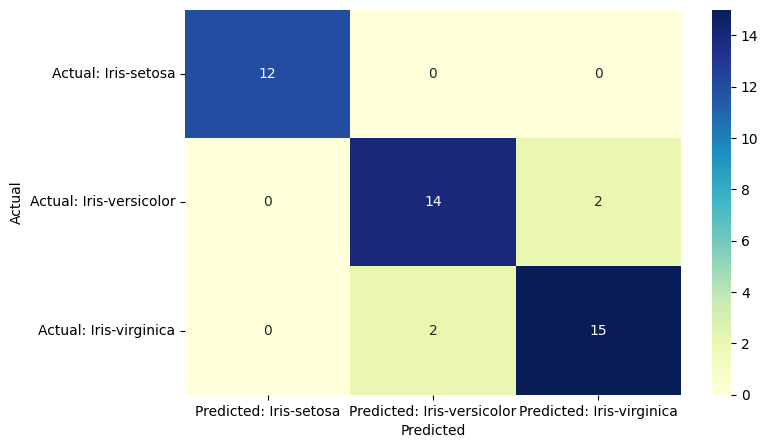

In [64]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred3)
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
conf_matrix = pd.DataFrame(data=cm, columns=[f'Predicted: {label}' for label in class_names],index=[f'Actual: {label}' for label in class_names])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [65]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gbc.fit(X_train, y_train)
y_pred4 = gbc.predict(X_test)
print(accuracy_score(y_test, y_pred4))
accuracy[str(gbc)] = accuracy_score(y_test, y_pred4)*100

0.8888888888888888


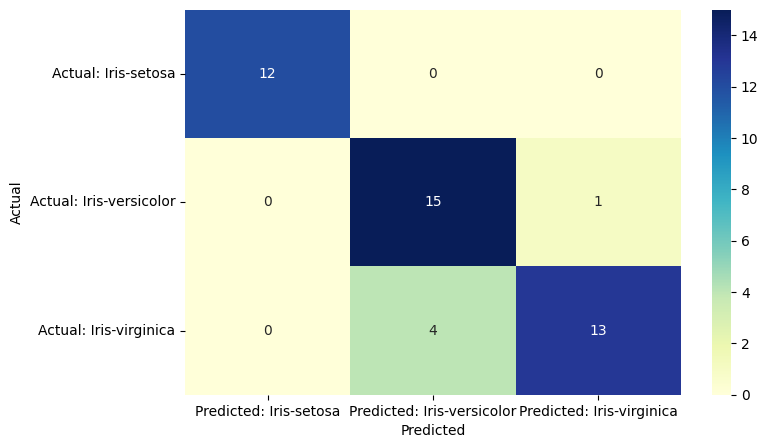

In [66]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred4)
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
conf_matrix = pd.DataFrame(data=cm, columns=[f'Predicted: {label}' for label in class_names],index=[f'Actual: {label}' for label in class_names])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# SVM 

In [67]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred5 = svc.predict(X_test)
print(accuracy_score(y_test, y_pred5))
accuracy[str(svc)] = accuracy_score(y_test, y_pred5)*100

0.9111111111111111


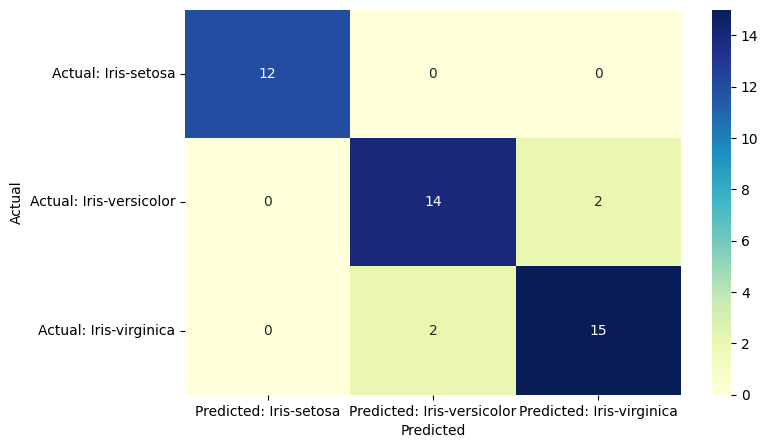

In [68]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred5)
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
conf_matrix = pd.DataFrame(data=cm, columns=[f'Predicted: {label}' for label in class_names],index=[f'Actual: {label}' for label in class_names])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [69]:
accuracy

{'LogisticRegression(max_iter=200)': 91.11111111111111,
 'DecisionTreeClassifier(max_depth=3)': 88.88888888888889,
 'RandomForestClassifier(max_depth=5)': 91.11111111111111,
 'GradientBoostingClassifier()': 88.88888888888889,
 'SVC()': 91.11111111111111}

# Conclusion

- Almost all heart disease people are above 50, which is obvious.
- Hypertesion disease in people of above 50.
- The most important features are "age", "bmi" and "glucose_level".
- Only 249 of the total dataset is positive for stroke(4.8%)
- This happens when we have very less(<5%) diagnosed positive for stroke i.e unbalanced target variable.
- We can use SMOTE(Synthetic Minority Oversampling Technique) to increase(oversample) the target varaible. It works by duplicating examples in the minority class.

# Handling this data using SMOTE

In [70]:
from imblearn.over_sampling import SMOTE

In [79]:
X = data.drop(columns=['Species']) 
y = data['Species']  

In [80]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [84]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y_encoded)
y_resampled_labels = le.inverse_transform(y_resampled)
y_resampled_series = pd.Series(y_resampled_labels)
print("Class distribution after SMOTE:")
print(y_resampled_series.value_counts())

Class distribution after SMOTE:
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


# Splitting the oversampling data

In [87]:
X_train, X_test, y_train, y_test = train_test_split(
    x_resampled,
    y_resampled,
    test_size=0.3,
    shuffle=True,
    random_state=3
)

In [88]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [89]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
print(accuracy_score(y_test, y_pred1))
accuracy[str(lr)] = accuracy_score(y_test, y_pred1)*100

0.9777777777777777


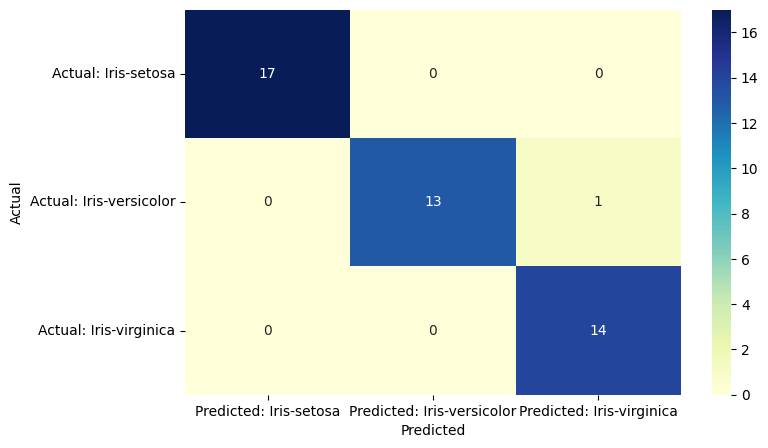

In [90]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred1)
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
conf_matrix = pd.DataFrame(data=cm, columns=[f'Predicted: {label}' for label in class_names],index=[f'Actual: {label}' for label in class_names])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [91]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [92]:
y_pred_test = lr.predict(X_test)
test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

In [93]:
test.head()

,Actual,Y test predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [94]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
knn_predict = knn_model.predict(X_test)
print(accuracy_score(y_test, knn_predict))
accuracy[str(lr)] = accuracy_score(y_test, knn_predict)*100

0.9333333333333333


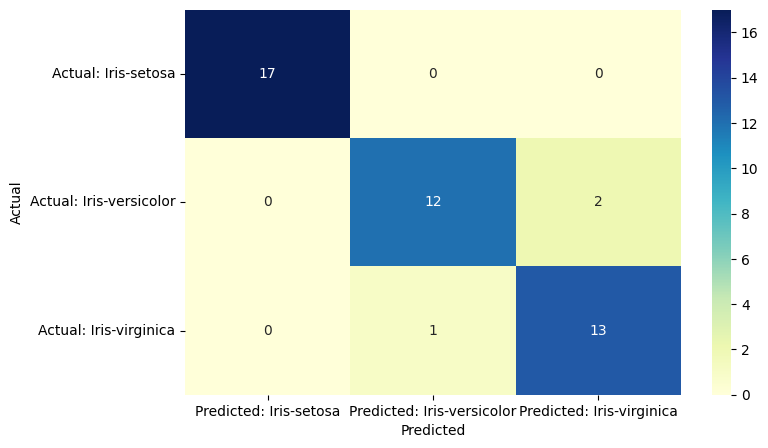

In [97]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,knn_predict)
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
conf_matrix = pd.DataFrame(data=cm, columns=[f'Predicted: {label}' for label in class_names],index=[f'Actual: {label}' for label in class_names])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [98]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      0.86      0.89        14
           2       0.87      0.93      0.90        14

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [99]:
y_pred_test = knn_model.predict(X_test)
test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

In [100]:
test.sample(10)

,Actual,Y test predicted
28,1,1
20,2,2
17,2,2
30,0,0
31,0,0
34,0,0
44,2,2
33,1,1
10,1,1
5,2,2


# Deep Learning 

In [101]:
import tensorflow as tf
from tensorflow import keras

# Create Neural Network

- Creating sequnetial ANN Network
- Creating 5 layers Network
- Activation is "Relu"
- Last layer is output layer
- Problem is binary classification thats way output node is 1 and activation is "sigmoid"

In [105]:
model=keras.Sequential([
    keras.layers.Dense(4800, activation='relu'),
    keras.layers.Dense(2000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'), 
    keras.layers.Dense(1,activation="sigmoid")
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

- compile method takes three arguments
- loss >> binary crossentropy
- optimizer >> adam
- matrix >> accuracy

In [103]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

- Fit method is used for fitting the data into model / neural network
- epochs = 100
- batch size = 100

In [104]:
train = model.fit(X_train, y_train, epochs=100,batch_size=100)

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 21, but received input with shape (None, 4)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 4), dtype=float32)
  • training=True
  • mask=None

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
y_pred=model.predict(X_test).flatten()
y_pred=np.round(y_pred)
y_pred[:11]
y_test[:11]
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

- Creating sequnetial ANN Network
- Creating 5 layers Network
- Activation is "Relu"
- Adding Dropout layer
- Last layer is output layer
- Problem is binary classification thats way output node is 1 and activation is "sigmoid"

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(21,)))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))
model.summary()

In [ ]:
model.compile(loss="binary_crossentropy", optimizer=Adam(lr=0.0001), metrics=['accuracy'])


In [ ]:
from keras.callbacks import EarlyStopping
cb = EarlyStopping(
    monitor='accuracy',
    min_delta=0.001,
    patience=100,
    mode='auto')

In [ ]:
model.fit(X_train, y_train,epochs=50, batch_size=100, validation_split=0.30,callbacks=cb)


# Testing the model

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
y_pred=model.predict(X_test).flatten()
y_pred=np.round(y_pred)

y_pred[:11]
y_test[:11]

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

The End: